## TensorFlow
* a cool python library for building, executing and visualizing computational graphs
* made for machine learning but can be used for any general purpose computation

Ok first lets import it (we'll use tf for short. That is the standard convention)

In [1]:
import tensorflow as tf

import some other stuff

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ok so we are going to be doing a simple linear regression with TensorFlow.

The ol\' classic y_ = w*x + b
given x, y pairs we try to find the w and b that minimize the average squared difference
between w*x + b and y for all pairs

Normally this can be solved in closed form with the normal equations, but we will find w and b iteratively using gradient descent just to better show what TensorFlow can do.


So we will need:
* **x** (our input data)
* **y** (the output values for the input data)
* **W** (the weight - a variable we are trying to find using optimization)
* **b** (the bias - another variable we need to find)

So let's make some input data with numpy
We'll use 1000 examples, so we need 1000 randomly generated inputs
And then we'll have our "real" W and b and y will be equal to
real_w * x + real_b plus a little random noise

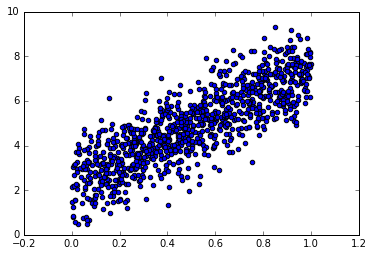

In [3]:
num_examples = 1000
x = np.random.uniform(low=0,high=1,size=(1000,))

real_w = 5.3
real_b = 2.2

noise = np.random.normal(size=(1000,))

y = real_w*x + real_b + noise

plt.scatter(x,y)

So there's our data. Doesn't form a perfect line, but it is evenly distributed around one

### Creating the Variables in the Graph

In making a graph in TensorFlow, there are two main types of variables that interact:
* **placeholders**
  * values that are fed into the graph, like the input data
* **variables** 
  * values that are used and even modified during the graph computation

x and y are input data, so they should be placeholders
Notice we use the tf.placeholder class and we pass the
* **dtype** 
  * (the type float,int,etc. for the variable)
* **shape** (the shape of the variable)
  * we we have 1000 examples so 1000 x's and 1000 y's will be input to the graph

In [4]:

x_ph = tf.placeholder(dtype=tf.float32, shape=(1000,))

y_ph = tf.placeholder(dtype=tf.float32, shape=(1000,))

W and b are variables we are going to iteratively tweaking during optimization, so they should be variables..

the only thing you have to pass to the tf.Variable class is its initial value, so we'll go with 1 and 0 for now

In [5]:
W = tf.Variable(initial_value=tf.ones(1), name="W") 

b = tf.Variable(tf.zeros(1), name="b")

### Building the Graph
Now let's start building our graph. Our equation is y_ = W * x +b, so let's specify that for the graph

In [6]:
y_ = W * x_ph + b

Now notice nothing has been computed yet; we are just specifying operations in the graph

In [7]:
print y_

Tensor("add:0", shape=(1000,), dtype=float32)


So y_ is an "add" operation because it is the result of the sum of those two terms

### Calculating the Loss
Now let's compute our mean square error

In [9]:
squared_diff = tf.square(y_ - y_ph)

In [10]:
print squared_diff

Tensor("Square_1:0", shape=(1000,), dtype=float32)


In [11]:
loss = tf.reduce_mean(squared_diff)
print loss

Tensor("Mean_1:0", shape=(), dtype=float32)


loss is a "Mean" operation

### Specifying the Optimization Algorithm
Now let's specify our optimization algorithm for finding W and b.
Our algorithm is going to gradient descent, so we specify a gradient descent optimizer

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

And we are minimizing our mean squared error, so let's specify that

In [14]:
train_step = optimizer.minimize(loss)

In [16]:
print train_step

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_W/ApplyGradientDescent"
input: "^GradientDescent/update_b/ApplyGradientDescent"



Notice tensorflow already knows what are the inputs that need to be tweaked in the optimization algorithm. it knows in minimizing the loss, it must adjust W and b because they are the "Variables"

### Executing the Graph
In order to actually execute the graph you need a tensorflow session, created using tf.Session()

In [17]:
sess = tf.Session()

Now we need to initialize all the variables, so we specify an "init" op

In [18]:
init = tf.global_variables_initializer()


to run a graph we use **sess.run** and we specify:
* **fetches** -> what we want to compute/excute 
* **feed_dict** -> mapping of placeholders to their real values, so here is our feed dict:

In [19]:
feed_dict= {x_ph:x, y_ph:y}

Now our first fetch is the init op because we need to initialize all the variables

In [20]:
sess.run(init)

Now for doing the optimization, we wanto execute "train_step" because that executes the minimizing of loss, which will cause the computation of the loss, which needs y_ph and y_, which needs W, b and x_ph, etc., so this will run our entire graph

Because the optimization is iterative, we input our data, run one "step", which computes the "gradient" (how sensitive the loss is to small increases in W and b) and uses that gradient to update W and b. We run 500 steps

In [21]:
losses=[]
for step in range(500):
    _, loss_ = sess.run(fetches=[train_step,loss], feed_dict=feed_dict)
    losses.append(loss_)
    

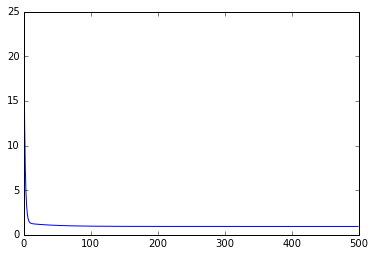

In [22]:
plt.plot(losses)

In [23]:
y_guess = sess.run(y_, feed_dict=feed_dict)

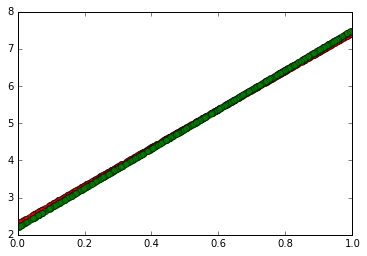

In [24]:
plt.figure(1)
plt.plot(x,y_guess, "o",color="r", alpha=0.5)
plt.plot(x,x*real_w+real_b, "o", color="g", alpha=0.5)